# Exploring Relations between SNAP benefits and Health Insurance

## Data Preparation

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

### SNAP State Rates

In [2]:
#!wget https://raw.githubusercontent.com/michaelbbryan/tools-and-kaggles/main/DataDive2022/snapmergecounty.csv

In [3]:
snap_county = pd.read_csv("snapmergecounty.csv", dtype={"countyFIPS":"str", "stateFIPS":"str"})

In [4]:
snap_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183005 entries, 0 to 183004
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Substate                       183005 non-null  object 
 1   PersonsPublic                  183005 non-null  float64
 2   PersonsNonPublic               183005 non-null  float64
 3   PersonsTotal                   183005 non-null  float64
 4   HouseholdsPublicAssistance     183005 non-null  float64
 5   HouseholdsNonPublicAssistance  183005 non-null  float64
 6   HouseholdsTotal                183005 non-null  float64
 7   Issuance                       183005 non-null  float64
 8   month                          183005 non-null  object 
 9   year                           183005 non-null  int64  
 10  countyFIPS                     183005 non-null  object 
 11  countyNAME                     183005 non-null  object 
 12  stateFIPS                     

In [5]:
snap_county_selection = snap_county[snap_county["year"].isin(["2015", "2016", "2017", "2018", "2019", "2020"])]
snap_county_selection = snap_county[snap_county["month"]=="JUL"]

### ACS Tables

In [6]:
acs_merge = pd.read_csv("acsmerge.csv", low_memory=False, dtype={"countyFIPS":"str"})

In [7]:
acs_meta = pd.read_csv("acsmetadata.csv")

In [8]:
acs_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2842 non-null   object
 1   Column Name        1979 non-null   object
 2   Label              1979 non-null   object
 3   Table Name         1979 non-null   object
 4   Table Description  1979 non-null   object
dtypes: object(5)
memory usage: 111.1+ KB


In [9]:
# Get FIPS reference data
fipsstate = pd.read_fwf('https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt',
                        skiprows=16, skipfooter=3198, dtype=str,
                        names=['stateFIPS','stateNAME'], colspecs = [(7, 9), (17, 30)])
fipscounty = pd.read_fwf('https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt',
                        skiprows=72, dtype=str,
                        names=['countyFIPS','countyNAME'], colspecs = [(4, 9), (17, 80)])
fipscounty['stateFIPS'] = fipscounty.countyFIPS.str[:2]
fips = pd.merge(fipscounty,fipsstate,on='stateFIPS',how='left')

In [10]:
# Add state info
acs_state = pd.merge(acs_merge, fips, on="countyFIPS", how="left")

In [11]:
acs_state["stateNAME"] = acs_state["stateNAME"].str.title()

### Merge datasets

In [12]:
snap_acs = pd.merge(acs_state, snap_county_selection, on=["year","countyFIPS"])

## Exploring relationships

In [13]:
BDT_states = ["Colorado", "Maryland", "Michigan", "New York", "North Carolina", "Pennsylvania",  "South Carolina"] 
additional_states = ["Alabama", "Florida", "Louisiana", "Mississippi", "Oklahoma", "Texas", "Tennessee"]

def BDT_identifier(w):
    if w in BDT_states:
        return 1
    elif w in additional_states:
        return 2
    else:
        return 0  

acs_state["BDT_states"] = acs_state["stateNAME"].apply(BDT_identifier)


In [14]:
snap_acs["BDT_states"] = snap_acs["stateNAME_x"].apply(BDT_identifier)

### All population

Text(0, 0.5, 'People insured')

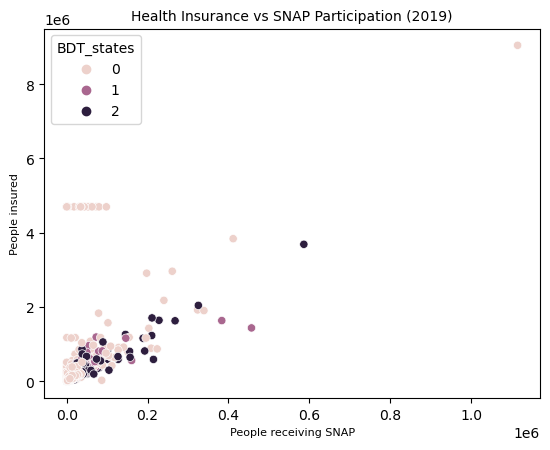

In [15]:
sns.scatterplot(data=snap_acs[snap_acs["year"]==2019], x="PersonsTotal", 
                y="S2701_C02_001E", hue="BDT_states")
plt.title("Health Insurance vs SNAP Participation (2019)", fontsize=10)
plt.xlabel("People receiving SNAP", fontsize=8)
plt.ylabel("People insured", fontsize=8)

Text(0, 0.5, 'People uninsured')

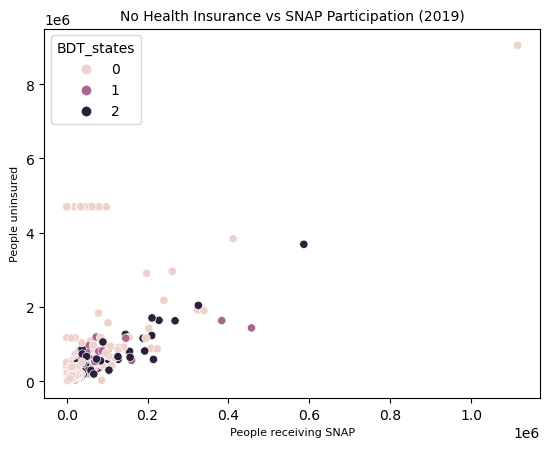

In [16]:
sns.scatterplot(data=snap_acs[snap_acs["year"]==2019], x="PersonsTotal", 
                y="S2701_C02_001E", hue="BDT_states")
plt.title("No Health Insurance vs SNAP Participation (2019)", fontsize=10)
plt.xlabel("People receiving SNAP", fontsize=8)
plt.ylabel("People uninsured", fontsize=8)

### Population below the 138% poverty threshold

Text(0, 0.5, 'People insured')

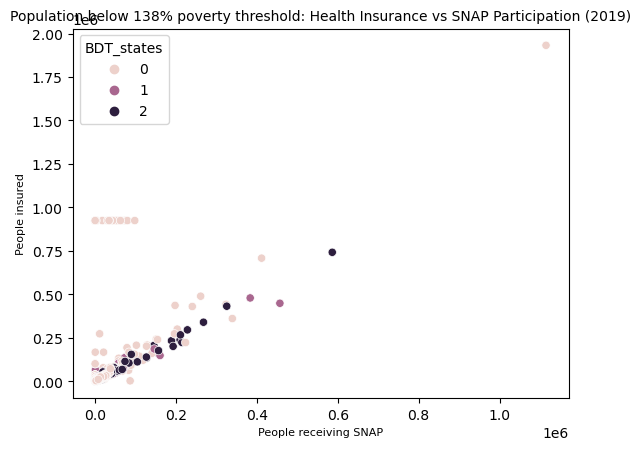

In [17]:
sns.scatterplot(data=snap_acs[snap_acs["year"]==2019], x="PersonsTotal", 
                y="S2701_C02_058E",hue="BDT_states")
plt.title("Population below 138% poverty threshold: Health Insurance vs SNAP Participation (2019)", fontsize=10)
plt.xlabel("People receiving SNAP", fontsize=8)
plt.ylabel("People insured", fontsize=8)

Text(0, 0.5, 'People uninsured')

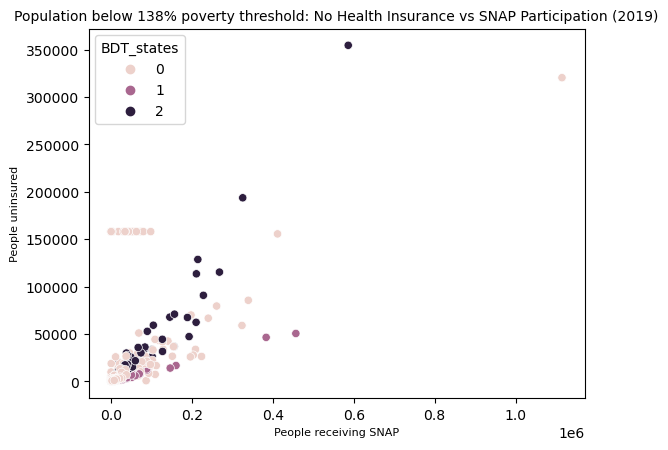

In [18]:
sns.scatterplot(data=snap_acs[snap_acs["year"]==2019], x="PersonsTotal", 
                y="S2701_C04_058E",hue="BDT_states")
plt.title("Population below 138% poverty threshold: No Health Insurance vs SNAP Participation (2019)", fontsize=10)
plt.xlabel("People receiving SNAP", fontsize=8)
plt.ylabel("People uninsured", fontsize=8)

### Public health

Text(0, 0.5, 'People insured')

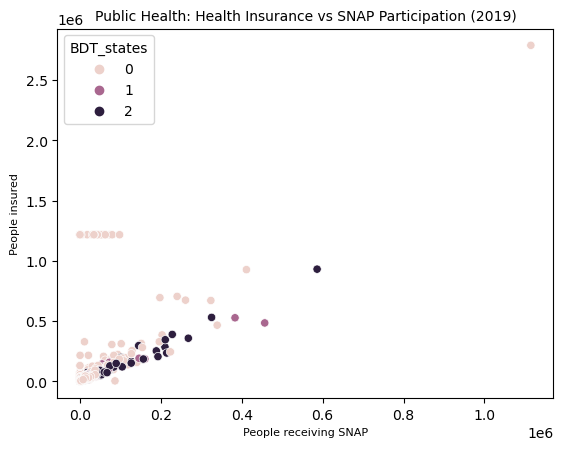

In [19]:
sns.scatterplot(data=snap_acs[snap_acs["year"]==2019], x="PersonsTotal", 
                y="S2704_C02_026E",hue="BDT_states")
plt.title("Public Health: Health Insurance vs SNAP Participation (2019)", fontsize=10)
plt.xlabel("People receiving SNAP", fontsize=8)
plt.ylabel("People insured", fontsize=8)

### Medicaid

Text(0, 0.5, 'People insured')

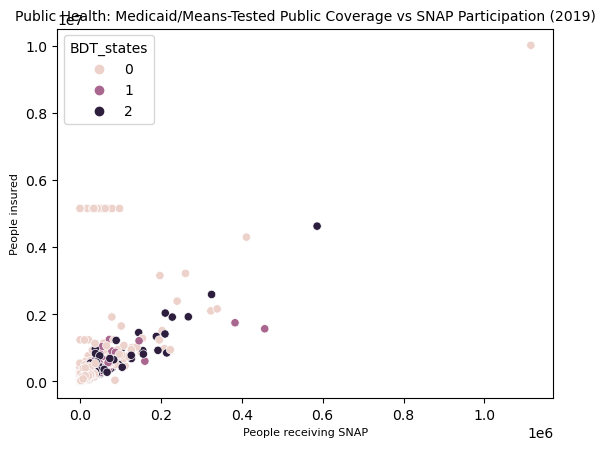

In [20]:
sns.scatterplot(data=snap_acs[snap_acs["year"]==2019], x="PersonsTotal", 
                y="C27007_001E",hue="BDT_states")
plt.title("Public Health: Medicaid/Means-Tested Public Coverage vs SNAP Participation (2019)", fontsize=10)
plt.xlabel("People receiving SNAP", fontsize=8)
plt.ylabel("People insured", fontsize=8)

## Insurance-SNAP Gap

### People below the 138% poverty line

#### With health insurance

In [21]:
eligible_insured_snap = snap_acs[["year","countyFIPS", "stateFIPS_x", "stateNAME_x", "BDT_states", "PersonsTotal", "S2701_C02_058E"]] 

In [22]:
eligible_insured_snap = eligible_insured_snap.assign(gap=eligible_insured_snap["S2701_C02_058E"]-eligible_insured_snap["PersonsTotal"])

In [23]:
eligible_insured_snap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13563 entries, 0 to 13562
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            13563 non-null  int64  
 1   countyFIPS      13563 non-null  object 
 2   stateFIPS_x     13563 non-null  object 
 3   stateNAME_x     13563 non-null  object 
 4   BDT_states      13563 non-null  int64  
 5   PersonsTotal    13563 non-null  float64
 6   S2701_C02_058E  13562 non-null  float64
 7   gap             13562 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 953.6+ KB


In [24]:
eligible_insured_snap["gap"].describe()

count    1.356200e+04
mean     5.692390e+04
std      3.332496e+05
min     -9.414200e+04
25%      1.064000e+03
50%      4.117500e+03
75%      1.743725e+04
max      7.237145e+06
Name: gap, dtype: float64

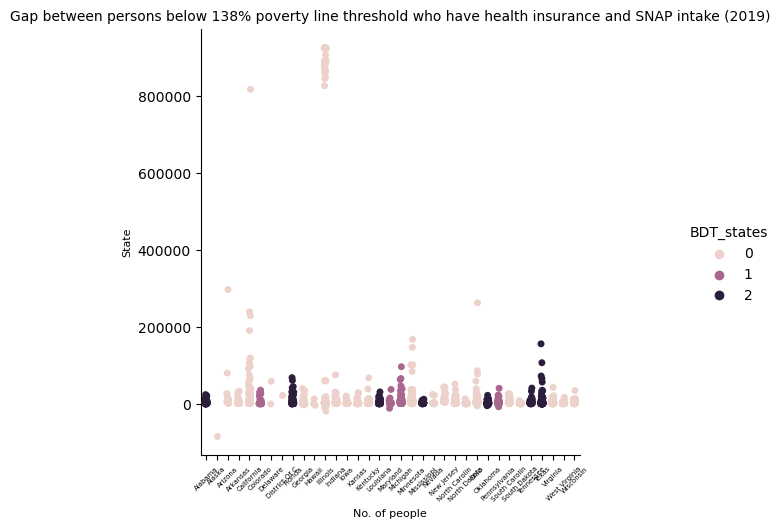

In [25]:
sns.catplot(data=eligible_insured_snap[eligible_insured_snap["year"]==2019], 
            x="stateNAME_x", y="gap", hue="BDT_states")
plt.title("Gap between persons below 138% poverty line threshold who have health insurance and SNAP intake (2019)", fontsize=10)
plt.xlabel("No. of people", fontsize=8)
plt.ylabel("State", fontsize=8)
plt.tick_params(axis='x', labelsize=5, rotation=45)

In [26]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import plotly.express as px

fig = px.scatter_geo(eligible_insured_snap[eligible_insured_snap["year"]==2019], 
                     geojson=counties, locations="countyFIPS",color="gap",
                     color_continuous_scale="Viridis", scope="usa",
                    title="Gap between persons below 138% poverty line threshold who have health insurance and SNAP intake (2019)")

fig.update_layout(
    title_font_family="Calibri",
    title_font_size=16,
    )

fig.show(renderer='iframe')

#### Without health insurance

In [27]:
eligible_uninsured_snap = snap_acs[["year","countyFIPS", "stateFIPS_x", "stateNAME_x", "BDT_states", "PersonsTotal", "S2701_C05_061E"]] 

In [28]:
eligible_uninsured_snap = eligible_uninsured_snap.assign(gap=eligible_uninsured_snap["S2701_C05_061E"]-eligible_uninsured_snap["PersonsTotal"])

In [29]:
eligible_uninsured_snap["gap"].describe()

count    1.356200e+04
mean    -1.264495e+04
std      4.212148e+04
min     -1.384470e+06
25%     -9.077100e+03
50%     -3.489850e+03
75%     -1.240075e+03
max      5.970000e+01
Name: gap, dtype: float64

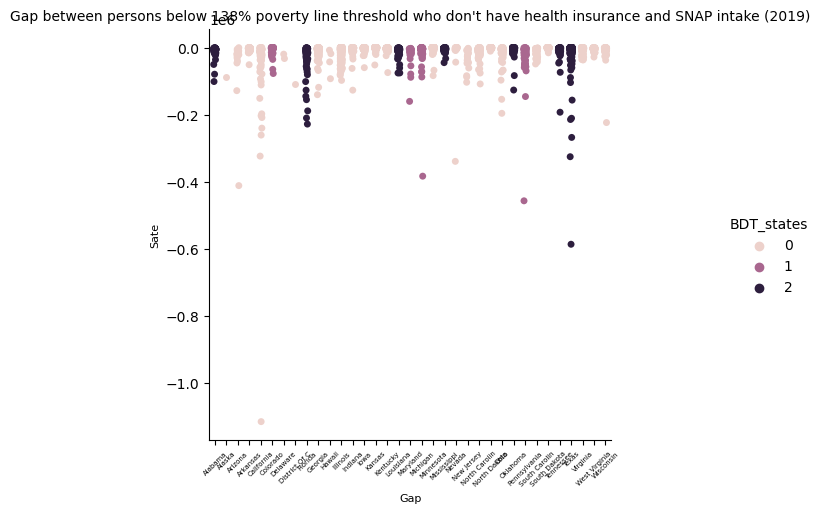

In [40]:
sns.catplot(data=eligible_uninsured_snap[eligible_uninsured_snap["year"]==2019], 
            x="stateNAME_x", y="gap", hue="BDT_states")
plt.title("Gap between persons below 138% poverty line threshold who don't have health insurance and SNAP intake (2019)", fontsize=10)
plt.xlabel("Gap", fontsize=8)
plt.ylabel("Sate", fontsize=8)
plt.tick_params(axis='x', labelsize=5, rotation=45)

### Public Insurance

In [31]:
pinsured_snap = snap_acs[["year","countyFIPS", "stateFIPS_x", "stateNAME_x","BDT_states","PersonsTotal", "S2704_C02_026E"]] 

In [32]:
pinsured_snap = pinsured_snap.assign(gap=pinsured_snap["S2704_C02_026E"]-pinsured_snap["PersonsTotal"])

In [33]:
pinsured_snap["gap"].describe()

count    1.356300e+04
mean     8.467733e+03
std      1.094464e+05
min     -1.166234e+06
25%     -2.437500e+03
50%      4.800000e+02
75%      2.803500e+03
max      1.676740e+06
Name: gap, dtype: float64

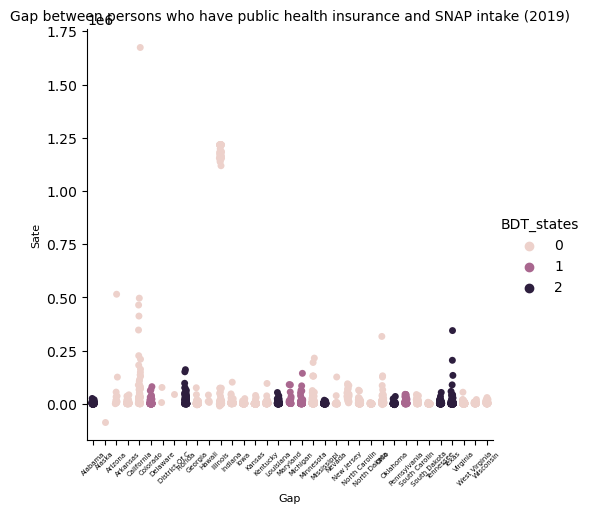

In [34]:
sns.catplot(data=pinsured_snap[pinsured_snap["year"]==2019], 
            x="stateNAME_x", y="gap", hue="BDT_states")
plt.title("Gap between persons who have public health insurance and SNAP intake (2019)", fontsize=10)
plt.xlabel("Gap", fontsize=8)
plt.ylabel("Sate", fontsize=8)
plt.tick_params(axis='x', labelsize=5, rotation=45)

In [35]:
fig = px.scatter_geo(pinsured_snap[pinsured_snap["year"]==2019], 
                     geojson=counties, locations="countyFIPS",color="gap",
                     color_continuous_scale="Viridis", scope="usa", size_max=50,
                    title= "Gap between persons who have public health insurance and SNAP intake (2019)")

fig.update_layout(
    title_font_family="Calibri",
    title_font_size=16,
    )

fig.show(renderer='iframe')

### Medicaid 

In [36]:
medicaid_snap = snap_acs[["year","countyFIPS", "stateFIPS_x", "stateNAME_x","BDT_states", "PersonsTotal", "C27007_001E"]] 

In [37]:
medicaid_snap = medicaid_snap.assign(gap=medicaid_snap["C27007_001E"]-medicaid_snap["PersonsTotal"])

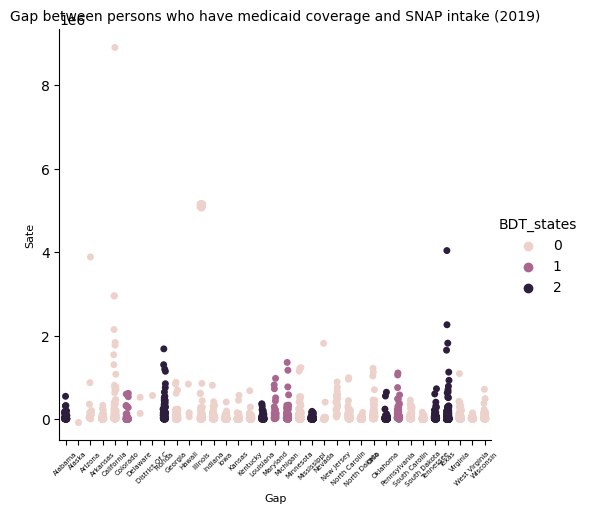

In [38]:
sns.catplot(data=medicaid_snap[medicaid_snap["year"]==2019], 
            x="stateNAME_x", y="gap", hue="BDT_states")
plt.title("Gap between persons who have medicaid coverage and SNAP intake (2019)", fontsize=10)
plt.xlabel("Gap", fontsize=8)
plt.ylabel("Sate", fontsize=8)
plt.tick_params(axis='x', labelsize=5, rotation=45)

In [39]:
fig = px.scatter_geo(medicaid_snap[medicaid_snap["year"]==2019], 
                     geojson=counties, locations="countyFIPS",color="gap",
                     color_continuous_scale="Viridis", scope="usa", size_max=50,
                    title= "Gap between persons who have medicaid coverage and SNAP intake (2019)")

fig.update_layout(
    title_font_family="Calibri",
    title_font_size=16,
    )

fig.show(renderer='iframe')

## Some insights

- There appears to be a positive direct relationship between people who are below the 138% poverty threshold and people who receive SNAP. 
- The relationship between public health insurance and SNAP intake is also positive. This is also true for Medicaid coverage.
- However, there is still a gap between the number of people with public health insurance and SNAP intake in the majority of counties. This is an area that could be of interest to explore by BDT, particularly in Maryland and Michigan (and Texas and Tennessee).  
- The number of SNAP beneficiaries exceeds by far than the number of people without health insurance in the vast majority of counties. As lack of insurance may be due to citizenship status or other elegibility criteria, further analysis should focus on public health insurance rather than focusing in lack of health insurance. 